<a href="https://colab.research.google.com/github/Prathi7/ML-Algorithms/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#do not change
import sys
import os
from time import time
%matplotlib inline
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
#from scipy.misc import imsave
import math

def load_mnist():
    images_url = 'https://github.com/guptashvm/Data/blob/master/data/train-images-idx3-ubyte?raw=true'
    with urlopen(images_url) as urlopened:
      fd = urlopened.read()
      loaded = np.frombuffer(fd,dtype=np.uint8)
      trX = loaded[16:].reshape((60000,28*28)).astype(float)

    labels_url = 'https://github.com/guptashvm/Data/blob/master/data/train-labels-idx1-ubyte?raw=true'
    with urlopen(labels_url) as urlopened:
      fd = urlopened.read()
      loaded = np.frombuffer(fd,dtype=np.uint8)
      trY = loaded[8:].reshape((60000))

    trY = np.asarray(trY)

    X = trX / 255.
    y = trY

    subset  = [i for i, t in enumerate(y) if t in [1, 0, 2, 3]]
    X, y = X.astype('float32')[subset], y[subset]
    return X[:1000], y[:1000]

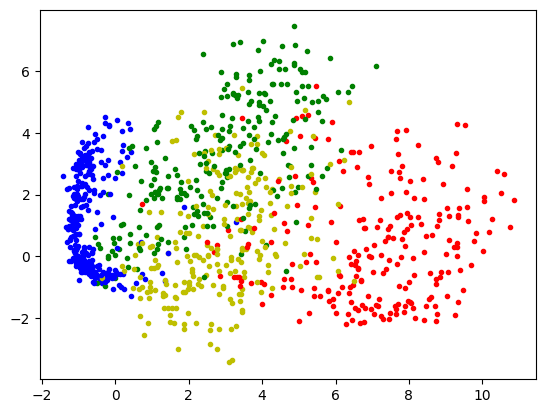

In [ ]:
X, y = load_mnist()
pca = PCA(n_components=2)
pca.fit(X)
X2d = X.dot(pca.components_.T)

def plot_with_colors(Xs, ys):
  for i, _ in enumerate(ys):
    if ys[i] == 0:
      plt.plot([Xs[i, 0]], [Xs[i, 1]], 'r.')
    elif ys[i] == 1:
      plt.plot([Xs[i, 0]], [Xs[i, 1]], 'b.')
    elif ys[i] == 2:
      plt.plot([Xs[i, 0]], [Xs[i, 1]], 'g.')
    elif ys[i] == 3:
      plt.plot([Xs[i, 0]], [Xs[i, 1]], 'y.')
  plt.show()

plot_with_colors(X2d, y)

In [ ]:
#kmeans
def kmeans(X, k = 4, max_iter = 500, random_state=0):
  """
  Inputs:
      X: input data matrix, numpy array with shape (n * d), n: number of data points, d: feature dimension
      k: number of clusters
      max_iters: maximum iterations
  Output:
      clustering label for each data point
  """
  assert len(X) > k, 'illegal inputs'
  np.random.seed(random_state)

  # randomly select k data points as centers
  idx = np.random.choice(len(X), k, replace=False)
  centers = X[idx]

  # please complete the following code:

  from scipy.spatial import distance
  for i in range(max_iter):
    H = distance.cdist(X, centers, 'euclidean')
    # Assigning data point to cluster
    labels = np.argmin(H,axis = 1)

    c = {0:[],1:[],2:[],3:[]}

    for r in range(X.shape[0]):
        if labels[r] in c:
            c[labels[r]].append(X[r])
    # Update centroid
    n_c = [np.mean(value,axis = 0) for value in c.values()]
    centers = np.stack(n_c,axis=0 )

  return labels

In [ ]:
def kmeans(X, k = 4, max_iter = 500, random_state=0):
  """
  Inputs:
      X: input data matrix, numpy array with shape (n * d), n: number of data points, d: feature dimension
      k: number of clusters
      max_iters: maximum iterations
  Output:
      clustering label for each data point
  """
  assert len(X) > k, 'illegal inputs'
  np.random.seed(random_state)

  # randomly select k data points as centers
  idx = np.random.choice(len(X), k, replace=False)
  centers = X[idx]

  # please complete the following code:

  from scipy.spatial import distance
  for i in range(max_iter):
    H = distance.cdist(X, centers, 'euclidean')
    # Assigning data point to cluster
    labels = np.argmin(H,axis = 1)

    c = {0:[],1:[],2:[],3:[]}

    for r in range(X.shape[0]):
        if labels[r] in c:
            c[labels[r]].append(X[r])
    # Update centroid
    n_c = [np.mean(value,axis = 0) for value in c.values()]
    centers = np.stack(n_c,axis=0 )

  return labels

In [ ]:
# your code here

accuracy = []
for i in range(10):
    y_pred = kmeans(X2d, k = 4, max_iter = 500,random_state=i)
    s = accuracy_score(y,y_pred)
    accuracy.append(s)

    plt.title("Random state:" + str(i) + " & Accuracy:" +str(s))
    plot_with_colors(X2d, y_pred)


print("Best Accuracy is ", max(accuracy))